# Logistic Regression Model

***Logistic regression*** is a simple machine learning method you can use to predict the value of a numeric categorical variable based on its relationship with predictor variable.

**How logistic regression differs from linear one?**

Logistic regression predicts categories for ordinal variables; linear regression predicts values for numeric, continuous variables.

**Logistic Regression Use Cases**

- Customer Churn Prediction
- Hazardous Event Prediction
- Employee Attrition Modelling
- Purchase Propensity vs. Ad Spend Analysis

**Logistic Regression Assumptions**

- Data is free of missing values.

- The predictant variable is _binary_ (that is, it only accepts two values) or _ordinal_ (that is, a categorical variable with ordered values).

- All predictors are independent of each other.

- There are at least 50 observations per predictor variable (to ensure reliable results).

## Segments 3 - Logistic regression on the titanic dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### 1. Opening and understanding the data

In [35]:
address = '/Users/yuliabezginova/PycharmProjects/Data_Science_Essentials_Nov2022/titanic-training-data.csv'

### VARIABLES DESCIPTION

- Survived - Survival (0 = No, 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare (British pound)
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

In [36]:
titanic_training = pd.read_csv(address)
titanic_training.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Checking for missing values

#### How to take care of missing values?

***Dropping missing values***
We can go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:

- Survived - This variable is obviusly relevant.
- Pclass - Does a passenger's classs on the boat affect their survivability?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability?
- Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability?
- Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
- Embarked - Does a person's point of embarkation matter? It depends on hoe the boat was filled. Let's keep it.

_What about a person's name, ticket number, and passenger ID number? They're irrelevant for predicting survivability. And as we recall, the cabin variable is almost all missing values, so we can just drop all of these._

In [38]:
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
pd.DataFrame(round(titanic_training.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


From the output above we can conclude there are missing values for 'Cabin' (77%), 'Age' (20%) and 'Embarked' (<1%). 

As discussed above, 'Cabin' missings can be dropped.
But 'Age' should be filled out.

In [41]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Imputing missing values

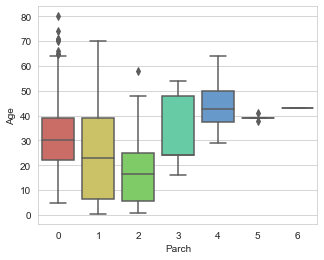

In [42]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls');

**From the boxplot above we can conlude the adequate relationship between number for children and passenger age.**

In [43]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


**From the groupped data we can see:**
- an average age for passengers with parch=0 is 32 (probably without children);
- an average age for passengers with parch=1 is 24 (probably with one kid);
- an average age for passengers with parch=2 is 32 (might be a couple or two friends).

**In order to fill out the missing values correctly, it is important to allocate a mean value to missings according to the Parch category.** Let's write a function for this.

In [44]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32 # see the above the mean value
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        elif Parch == 5:
            return 39
        elif Parch == 6:
            return 43
        else:
            return 30 # see describe() an mean value for age
    else:
        return Age
            
        

In [45]:
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [46]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)

In [48]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


**There are no missing values in the dataset, so we can further proceed.**

### 3. Checking that your target variable is binary

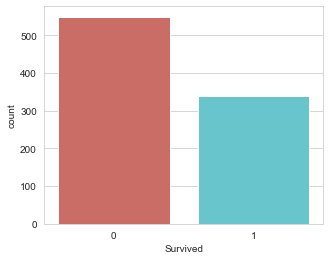

In [49]:
sb.countplot(x='Survived',data=titanic_data, palette='hls');

## 4. Converting categorical variables to a dummy indicators

**The .fit() method takes the independent and dependent values as parameters and fills the regression object with data that describes the relationship.**

In [50]:
from sklearn.preprocessing import LabelEncoder

### 4.1 Creating a labeled dummy variable for a 'Gender' variable.

In [52]:
label_encoder = LabelEncoder()
gender_cat= titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

Cool, but now we do not understand whether 1 is for male or female as for 0. Let's determine what one actually indicates.

In [53]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [54]:
# 1 - male, 0 - female
gender_df = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


### 4.2 Creating a labeled variable to a variable 'Embarked'

In [55]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

From the labeling output above we can see that 'Embarked' categories are now multinomial. But we need embarked to be represented by a binary labels.

In [61]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [62]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [64]:
titanic_dmy = pd.concat([titanic_data, gender_df, embarked_df], axis=1, verify_integrity=True).astype(float)
titanic_dmy[0:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


### 4.3 Checking for independence between features

Let's run a correlation analysis. **If we have a correlation, which is close to 1 or -1, it means there is a strong linear relationship between two variables.**

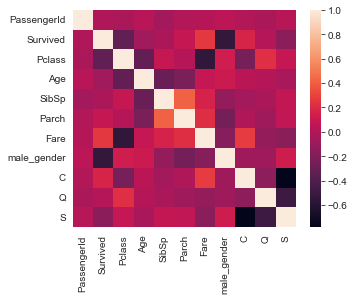

In [67]:
sb.heatmap(titanic_dmy.corr());

**Conclusion**: From the heatmap for correlation analysis, we can see that the variables are independent on one another, since there are no strong correlations between them.

In [68]:
titanic_dmy.drop(['Fare','Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


### 4.4 Checking that your dataset size is sufficient

In [69]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [70]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1),
                                                   titanic_dmy['Survived'], test_size=0.2,
                                                   random_state=200)

In [71]:
print(X_train.shape)
print(y_train.shape)

(711, 8)
(711,)


In [72]:
X_train[0:5]

,PassengerId,Age,SibSp,Parch,male_gender,C,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


## 5. Deploying and evaluating the model

In [79]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [74]:
y_pred = LogReg.predict(X_test)

## 6. Model Evaluation

### 6.1 Classification report without cross-validation

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



### 6.2 K-fold cross-validation & confusion matrices

In [76]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]])

**From the confusion matrix we can conclude that there are 377 correct and 63 incorrect, and 91 incorrect and 180 correct predictions.**

In [77]:
precision_score(y_train, y_train_pred)

0.7407407407407407

### 6.3 Make a test prediction

In [78]:
# pull a one row of data
titanic_dmy[863:864]

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


**.reshape(1, -1) needs to be added to the test prediction to ensure that the output is in the correct form.**

In [80]:
test_passenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1,-1)

print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger))

[1.]
[[0.26351831 0.73648169]]


**From the above prediction the passenger will survive (1.) and the probability that this prediction is correct is 73.6%.**

Thank you for going through this projet. 
Your comments are more then welcome to ybezginova2021@gmail.com

Best wishes,

Yulia